<a href="https://colab.research.google.com/github/yuewang326/myproject.github.io/blob/master/Updated_MDCM_Logistic_RegressionCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Let's trade stocks!/MDCM/Data & Glossary/NCAA_Tourney_2002_2019_update.csv")

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#df = pd.read_csv("NCAA_Tourney_2002_2019_update.csv")

In [ ]:
df.head(3)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,...,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id
0,1192.0,82,1341.0,76,N,0,X16a,X16b,16,16,16,16,X,X,X16,F Dickinson,Prairie View,2019,dayton,39.7594,-84.1917,40.896162,-74.030023,30.094591,-95.992066,greg-herenda-1,1.0,1.0,0.0,0.0,0.0,0.0,81.0,107.0,81.0,107.0,21.0,13.0,21.0,13.0,...,40.468227,74.422442,10.171017,51.575158,34.339080,70.329670,9.156194,34.929907,38.516879,53.201970,51.477833,0.108950,0.089778,49.649805,31.432974,68.149883,4.616725,53.484321,30.793157,69.304556,11.050584,33.557394,35.901731,48.218527,52.093596,0.121483,0.070552,67.8895,66.8424,108.370,106.296,104.7090,110.550,72.5879,71.0282,103.120,101.6550,99.7542,105.959,2019-1192.0-1341.0
1,1125.0,81,1396.0,70,N,0,W11a,W11b,11,11,11,11,W,W,W11,Belmont,Temple,2019,dayton,39.7594,-84.1917,36.133866,-86.794715,39.980943,-75.158267,rick-byrd-1,7.0,7.0,0.0,0.0,0.0,0.0,415.0,219.0,415.0,219.0,27.0,5.0,27.0,5.0,...,37.112172,73.556797,9.127302,47.237790,34.690799,69.811321,10.335196,43.828452,34.675732,61.894737,44.512195,0.089031,0.082799,50.374688,33.057851,73.113208,6.315789,51.140351,32.670455,67.684887,6.744380,37.675143,38.177874,54.792899,49.938499,0.121583,0.077251,74.2457,71.1915,116.393,114.952,99.6691,101.886,70.1158,68.8256,105.306,108.9910,100.1860,99.563,2019-1125.0-1396.0
2,1295.0,78,1300.0,74,N,0,W16a,W16b,16,16,16,16,W,W,W16,N Dakota St,NC Central,2019,dayton,39.7594,-84.1917,46.894523,-96.805689,35.974237,-78.898602,david-richman-1,1.0,1.0,0.0,0.0,0.0,0.0,96.0,66.0,96.0,66.0,19.0,15.0,19.0,15.0,...,36.842105,76.470588,6.643658,52.890423,36.645963,74.576271,9.670080,48.172170,35.718247,46.062992,44.994111,0.070765,0.079430,51.674641,31.177446,70.363636,6.912029,50.897666,31.533101,68.773946,10.909091,36.589806,34.004739,59.478022,52.540107,0.078098,0.090950,66.4861,64.8533,108.198,106.675,110.0540,109.873,67.1363,65.2686,100.502,96.7551,100.7490,108.661,2019-1295.0-1300.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from math import sin, cos, sqrt, atan2, radians
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def distance(lat1, lon1, lat2, lon2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [ ]:
df['dist1'] = df.apply(lambda row: distance(row['host_lat'], row['host_long'], row['team1_lat'], row['team1_long']), axis=1)
df['dist2'] = df.apply(lambda row: distance(row['host_lat'], row['host_long'], row['team2_lat'], row['team2_long']), axis=1)

In [ ]:
df['diff_dist'] = df['dist1'] - df['dist2']

In [ ]:
## E(W%) = points scored^11.5 / (points scored^11.5+points allowed^11.5)

In [ ]:
df['exp_win1'] = (df['team1_adjoe']**11.5)/ ((df['team1_adjde']**11.5)+(df['team1_adjoe']**11.5))
df['exp_win2'] = (df['team2_adjoe']**11.5)/ ((df['team2_adjde']**11.5)+(df['team2_adjoe']**11.5))

# Log 5
P(W) = (A - A B) / (A + B - 2A*B)

Log 5 is a formula invented by Bill James[1] to estimate the probability that team A will win a game, based on the true winning percentage of Team A and Team B.

In [ ]:
df['team1_log5'] = (df['exp_win1'] - (df['exp_win1']*df['exp_win2']))/ (df['exp_win1']+df['exp_win2']-(2*df['exp_win1']*df['exp_win2']))

In [ ]:
#seed_compare

In [ ]:
## add Seed _difference
seed_diff = list(df['team1_seed'] - df['team2_seed'])

seed_compare = []
for i in seed_diff:
  if i >= 6:
    seed_compare.append(1)
  elif i <= 6:
    seed_compare.append(-1)
  else:
    seed_compare.append(0)

In [ ]:
df['seed_diff'] = seed_compare

In [ ]:
df.head(10)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,...,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,dist1,dist2,diff_dist,exp_win1,exp_win2,team1_log5,seed_diff
0,1192.0,82,1341.0,76,N,0,X16a,X16b,16,16,16,16,X,X,X16,F Dickinson,Prairie View,2019,dayton,39.7594,-84.1917,40.896162,-74.030023,30.094591,-95.992066,greg-herenda-1,1.0,1.0,0.0,0.0,0.0,0.0,81.0,107.0,81.0,107.0,21.0,13.0,21.0,13.0,...,34.929907,38.516879,53.201970,51.477833,0.108950,0.089778,49.649805,31.432974,68.149883,4.616725,53.484321,30.793157,69.304556,11.050584,33.557394,35.901731,48.218527,52.093596,0.121483,0.070552,67.8895,66.8424,108.370,106.296,104.7090,110.5500,72.5879,71.0282,103.120,101.6550,99.7542,105.9590,2019-1192.0-1341.0,870.390058,1518.423483,-648.033425,0.389061,0.382990,0.506403,-1
1,1125.0,81,1396.0,70,N,0,W11a,W11b,11,11,11,11,W,W,W11,Belmont,Temple,2019,dayton,39.7594,-84.1917,36.133866,-86.794715,39.980943,-75.158267,rick-byrd-1,7.0,7.0,0.0,0.0,0.0,0.0,415.0,219.0,415.0,219.0,27.0,5.0,27.0,5.0,...,43.828452,34.675732,61.894737,44.512195,0.089031,0.082799,50.374688,33.057851,73.113208,6.315789,51.140351,32.670455,67.684887,6.744380,37.675143,38.177874,54.792899,49.938499,0.121583,0.077251,74.2457,71.1915,116.393,114.952,99.6691,101.8860,70.1158,68.8256,105.306,108.9910,100.1860,99.5630,2019-1125.0-1396.0,463.360180,771.236814,-307.876634,0.800207,0.738939,0.585922,-1
2,1295.0,78,1300.0,74,N,0,W16a,W16b,16,16,16,16,W,W,W16,N Dakota St,NC Central,2019,dayton,39.7594,-84.1917,46.894523,-96.805689,35.974237,-78.898602,david-richman-1,1.0,1.0,0.0,0.0,0.0,0.0,96.0,66.0,96.0,66.0,19.0,15.0,19.0,15.0,...,48.172170,35.718247,46.062992,44.994111,0.070765,0.079430,51.674641,31.177446,70.363636,6.912029,50.897666,31.533101,68.773946,10.909091,36.589806,34.004739,59.478022,52.540107,0.078098,0.090950,66.4861,64.8533,108.198,106.675,110.0540,109.8730,67.1363,65.2686,100.502,96.7551,100.7490,108.6610,2019-1295.0-1300.0,1290.217292,626.900746,663.316546,0.415885,0.208404,0.730051,-1
3,1113.0,74,1385.0,65,N,0,X11a,X11b,11,11,11,11,X,X,X11,Arizona St,St John's,2019,dayton,39.7594,-84.1917,33.421922,-111.940011,40.721979,-73.795301,bobby-hurley-1,1.0,2.0,0.0,0.0,0.0,0.0,73.0,57.0,115.0,77.0,23.0,10.0,23.0,10.0,...,35.733053,43.450479,51.116334,54.838710,0.084913,0.086620,51.157223,36.118252,72.529313,10.036496,50.456204,34.068627,70.777480,6.384677,38.306253,42.677824,50.216920,54.151625,0.120499,0.070809,72.1332,70.5600,106.426,109.886,99.8027,98.6844,72.3507,70.5516,105.988,109.7820,102.5140,101.0440,2019-1113.0-1385.0,2564.817181,888.650148,1676.167033,0.774944,0.721882,0.570190,-1
4,1278.0,86,1257.0,76,N,0,W10,W07,10,7,7,10,W,W,R1W7,Minnesota,Louisville,2019,des_moines,41.6000,-93.6100,44.977886,-93.235352,38.215752,-85.758843,richard-pitino-1,1.0,1.0,0.0,0.0,0.0,0.0,111.0,91.0,129.0,105.0,21.0,13.0,21.0,13.0,...,28.824142,33.666833,60.238095,50.230415,0.070279,0.087525,50.558659,34.172662,77.462687,8.048780,45.691057,31.710709,69.692058,10.614525,43.710692,36.890713,53.381643,48.354430,0.064076,0.08

In [ ]:
any(['team1_log5']) is None

False

In [ ]:
# Split data

In [ ]:
df.head(3)

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,...,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,dist1,dist2,diff_dist,exp_win1,exp_win2,team1_log5,seed_diff
0,1192.0,82,1341.0,76,N,0,X16a,X16b,16,16,16,16,X,X,X16,F Dickinson,Prairie View,2019,dayton,39.7594,-84.1917,40.896162,-74.030023,30.094591,-95.992066,greg-herenda-1,1.0,1.0,0.0,0.0,0.0,0.0,81.0,107.0,81.0,107.0,21.0,13.0,21.0,13.0,...,34.929907,38.516879,53.201970,51.477833,0.108950,0.089778,49.649805,31.432974,68.149883,4.616725,53.484321,30.793157,69.304556,11.050584,33.557394,35.901731,48.218527,52.093596,0.121483,0.070552,67.8895,66.8424,108.370,106.296,104.7090,110.550,72.5879,71.0282,103.120,101.6550,99.7542,105.959,2019-1192.0-1341.0,870.390058,1518.423483,-648.033425,0.389061,0.382990,0.506403,-1
1,1125.0,81,1396.0,70,N,0,W11a,W11b,11,11,11,11,W,W,W11,Belmont,Temple,2019,dayton,39.7594,-84.1917,36.133866,-86.794715,39.980943,-75.158267,rick-byrd-1,7.0,7.0,0.0,0.0,0.0,0.0,415.0,219.0,415.0,219.0,27.0,5.0,27.0,5.0,...,43.828452,34.675732,61.894737,44.512195,0.089031,0.082799,50.374688,33.057851,73.113208,6.315789,51.140351,32.670455,67.684887,6.744380,37.675143,38.177874,54.792899,49.938499,0.121583,0.077251,74.2457,71.1915,116.393,114.952,99.6691,101.886,70.1158,68.8256,105.306,108.9910,100.1860,99.563,2019-1125.0-1396.0,463.360180,771.236814,-307.876634,0.800207,0.738939,0.585922,-1
2,1295.0,78,1300.0,74,N,0,W16a,W16b,16,16,16,16,W,W,W16,N Dakota St,NC Central,2019,dayton,39.7594,-84.1917,46.894523,-96.805689,35.974237,-78.898602,david-richman-1,1.0,1.0,0.0,0.0,0.0,0.0,96.0,66.0,96.0,66.0,19.0,15.0,19.0,15.0,...,48.172170,35.718247,46.062992,44.994111,0.070765,0.079430,51.674641,31.177446,70.363636,6.912029,50.897666,31.533101,68.773946,10.909091,36.589806,34.004739,59.478022,52.540107,0.078098,0.090950,66.4861,64.8533,108.198,106.675,110.0540,109.873,67.1363,65.2686,100.502,96.7551,100.7490,108.661,2019-1295.0-1300.0,1290.217292,626.900746,663.316546,0.415885,0.208404,0.730051,-1


In [ ]:
df['team1_win'] = (df['team1_score']>df['team2_score']).astype(int)

In [ ]:
def tran(x):
  if x != 0:
    return 1
  else: 
    return 0


## Add one more feature here ! 

Has the team coach been to final four before?

team_ff 

Yes-1

No-0

In [ ]:
df['team1_ff'] = df['team1_pt_overall_ff'].apply(tran)

In [ ]:
df['team2_ff'] = df['team2_pt_overall_ff'].apply(tran)

In [ ]:
df['ff_diff'] = df['team1_ff'] - df['team2_ff']

In [ ]:
len(df['team1_ff'])

1167

In [ ]:
df.to_csv("Processed_dataset.csv")
from google.colab import files
#files.download("Processed_dataset.csv")

In [ ]:
np.random.seed(0)

def shuffle(df):     
    df = df.reindex(np.random.permutation(df.index)).copy()
    return df.reset_index(drop=True)
random_indices = random.sample(range(len(df)), int(len(df)/2))

In [ ]:
df_1 = df[~df.index.isin(random_indices)][['game_id','season','team1_win','exp_win1','exp_win2','team2_score', 'team1_score','diff_dist','team1_log5','team1_id','team2_id','seed_diff', 'ff_diff']].reset_index(drop=True)
df_2 = df[df.index.isin(random_indices)][['game_id','season','team1_win','exp_win1','exp_win2','team2_score','team1_score','diff_dist','team1_log5','team1_id','team2_id','seed_diff', 'ff_diff']].reset_index(drop=True)

In [ ]:
df_2['team1_win'] = df['team1_win'].apply(lambda x: 1 if x==0 else 0)
df_2['diff_dist'] = df['diff_dist']*-1
df_2['ff_diff'] = df['ff_diff']*-1
df_2['seed_diff'] = df['seed_diff']*-1
df_2.columns = ['game_id', 'season', 'team1_win', 'exp_win2', 'exp_win1', 'team1_score', 'team2_score', 'diff_dist', 'team1_log5',
 'team2_id', 'team1_id','seed_diff', 'ff_diff']



In [ ]:
mm_train = pd.concat([df_2, df_1])

In [ ]:
mm_data_2019 = mm_train[mm_train['season'] == 2019].reset_index(drop=True)
mm_data_else =  mm_train[mm_train['season'] != 2019].reset_index(drop=True)

Initial check(Add one more feature)

In [ ]:
mm_data_else.groupby('team1_win')['team1_log5'].mean()


team1_win
0    0.616196
1    0.624193
Name: team1_log5, dtype: float64

In [ ]:
mm_data_else.groupby('team1_win')['diff_dist'].mean()

team1_win
0    232.610428
1   -254.214522
Name: diff_dist, dtype: float64

In [ ]:
mm_data_else.groupby('team1_win')['ff_diff'].mean()

team1_win
0   -0.176685
1    0.208711
Name: ff_diff, dtype: float64

# 4 features :'team1_log5','diff_dist','seed_diff', 'ff_diff'

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
scaler = StandardScaler()
mm_train_scaled = scaler.fit_transform(mm_data_else[['team1_log5','diff_dist','seed_diff', 'ff_diff']])

labels = np.unique(mm_data_else['team1_win'])
scoring = make_scorer(log_loss, greater_is_better=False, labels=labels, needs_proba=True)


logit = LogisticRegressionCV(scoring=scoring)
logit.fit(mm_train_scaled, mm_data_else['team1_win'])


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True, labels=[0 1]),
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
mm_train_scaled

array([[ 0.13623207, -0.5925409 , -1.00181984,  1.42556613],
       [ 0.83681433, -0.85465824,  0.99818347, -0.02371552],
       [ 1.79081222,  0.653166  ,  0.99818347, -1.47299717],
       ...,
       [ 1.14607647, -0.03730147, -1.00181984, -0.02371552],
       [-1.4696495 , -1.07855668, -1.00181984, -0.02371552],
       [ 0.13841533, -0.05297765, -1.00181984,  1.42556613]])

In [ ]:
smlogit = sm.Logit(mm_data_else['team1_win'], mm_data_else[['team1_log5','diff_dist','seed_diff', 'ff_diff']]).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.275329
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                 1100
Model:                          Logit   Df Residuals:                     1096
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Apr 2021   Pseudo R-squ.:                  0.6028
Time:                        18:48:50   Log-Likelihood:                -302.86
converged:                       True   LL-Null:                       -762.46
Covariance Type:            nonrobust   LLR p-value:                6.071e-199
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
team1_log5    -0.3401      0.174     -1.950      0.051      -0.682       0.002
diff_dist   -4.71e-05   9.45e-05     -0.498      0.618      -0.000       0.000
seed_diff     -2.5587      0.133    -19.216      0.000      -2.820      -2.298
ff_diff       -0.3098      0.181     -1.709      0.087      -0.665       0.046
==============================================================================
"""

In [ ]:
mm_data_2019['prob'] = logit.predict_proba(scaler.fit_transform(mm_data_2019[['team1_log5','diff_dist','seed_diff','ff_diff']]))[:,1]
mm_data_2019['prediction'] = logit.predict(scaler.fit_transform(mm_data_2019[['team1_log5','diff_dist','seed_diff','ff_diff']]))

In [ ]:
accuracy_score(mm_data_2019['team1_win'], mm_data_2019['prediction'],)

0.9402985074626866

In [ ]:
precision_score(mm_data_2019['team1_win'], mm_data_2019['prediction'])

0.9142857142857143

In [ ]:
recall_score(mm_data_2019['team1_win'], mm_data_2019['prediction'])

0.9696969696969697

In [ ]:
f1_score(mm_data_2019['team1_win'], mm_data_2019['prediction'])

0.9411764705882354

In [ ]:
log_loss(mm_data_2019['team1_win'].values, mm_data_2019['prob'].values)

0.21744757654707594

In [ ]:
roc_auc_score(mm_data_2019['team1_win'].values, mm_data_2019['prob'].values)

0.9554367201426025

In [ ]:
def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    fig, ax = plt.subplots()
    ax.set(title='Receiver Operating Characteristic',
           xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

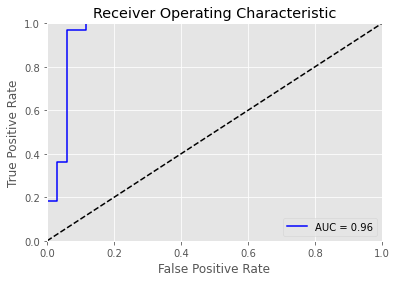

In [ ]:

fpr, tpr, thresholds = roc_curve(mm_data_2019['team1_win'].values, mm_data_2019['prob'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [ ]:
# submission candidate 1
mm_data_2019[['game_id','prob','team1_win']]

,game_id,prob,team1_win
0,2019-1192.0-1341.0,0.077301,0
1,2019-1125.0-1396.0,0.059228,0
2,2019-1261.0-1463.0,0.029415,0
3,2019-1196.0-1305.0,0.114556,0
4,2019-1276.0-1285.0,0.012396,0
...,...,...,...
62,2019-1246.0-1222.0,0.955809,1
63,2019-1438.0-1345.0,0.909494,1
64,2019-1120.0-1246.0,0.986459,1
65,2019-1438.0-1120.0,0.889497,1


In [ ]:
mm_data_2019[['game_id','prob']].to_csv("Let's Trade Stocks.csv")
from google.colab import files
#files.download("Let's Trade Stocks.csv")